![logo](../img/LogoLine_horizon_C3S.png)

# Tutorial on Analysis of Upper Tropospheric Humidity (UTH) using climate data from C3S

## 1. Introduction

This tutorial is about Upper Tropospheric Humidity (UTH) as a part of the Essential Climate Variable (ECV) <i>Water Vapour</i>. We will learn how to access the data from the Climate Data Store (CDS) of the Copernicus Climate Change Service (C3S) and present an idea how to process and visualize the data following. Once you feel comfortable with the python code, you are invited to adjust or extend the code according to your interests! To run each section (either HTML or python sections) just press **Shift** + **Enter** and the code will be executed. After a short introduction how to use a Jupyter notebook it goes right away with the analysis!

![logo](./images/uth-overview.png)

### How to access the notebook

This tutorial is in the form of a [Jupyter notebook](https://jupyter.org/). You will not need to install any software for the training as there are a number of free cloud-based services to create, edit, run and export Jupyter notebooks such as this. Here are some suggestions (simply click on one of the links below to run the notebook):

|Binder|Kaggle|Colab|NBViewer|
|:-:|:-:|:-:|:-:|
|[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/ecmwf-projects/copernicus-training/HEAD?urlpath=lab/tree/C3S_climate-data-store.ipynb)|[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/ecmwf-projects/copernicus-training/blob/master/C3S_climate-data-store.ipynb)|[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ecmwf-projects/copernicus-training/blob/master/C3S_climate-data-store)|[![NBViewer](https://raw.githubusercontent.com/ecmwf-projects/copernicus-training/master/img/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/ecmwf-projects/copernicus-training/blob/master/C3S_climate-data-store.ipynb)|
|(Binder may take some time to load, so please be patient!)|(will need to login/register, and switch on the internet via *settings*)|(will need to run the command `!pip install cartopy` before importing the libraries)|(this will not run the notebook, only render it)|

If you would like to run this notebook in your own environment, we suggest you install [Anaconda](https://docs.anaconda.com/anaconda/install/), which contains most of the libraries you will need. You will also need to install [Xarray](http://xarray.pydata.org/en/stable/) for working with multidimensional data in netcdf files, and the CDS API (`pip install cdsapi`) for downloading data programatically from the CDS.

### Outline

These include a brief introduction into the variable followed by a step-by-step guidance how to retrieve the data. With this done the focus is on analysing and visualising the data in various ways.

1. Introduction
2. Retrieve data
3. UTH variation and climatology over Europe
    - Temporal mean over Europe
    - Climatology over Europe
4. Global UTH distribution, seasonal variation and annual cycle
    - Temporal mean with global coverage
    - Seasonal average with global coverage
    - Annual cycle with global coverage
5. Literature


### Rationale

Upper Tropospheric Humidity (UTH) is part of the Essential Climate Variable (ECV) Inventory of <i>Water Vapour</i> together with Total Column Water Vapour (TCWV) and Tropospheric Humidity Profiles.

UTH and Water vapour in general is an important greenhouse gas. Water vapour accounts for 85-90% of the greenhouse effect since it emits and absorbs the earth's outgoing longwave radiation at many wavelenghts and has by far the most occurance compared to other greenhouse gases [[1]](#Literature). It is mostly not anthropogenic and therefore less present in the media but indeed important to monitor for understanding it's trend and impact on climate change. UTH is relevant for atmospheric processes like cloud formation/feedback and has also an indirect effect on global warming:
Emissions of anthropogenic greenhouse gases like carbon dioxide and methane lead to a warmer atmosphere due to the greenhouse effect. The warmer air in turn is able to contain more water vapour compared to colder air which potentially leads to increased water vapour concentrations. This amplifies the positive impact of anthropogenic emissions on global warming and is a net positive feedback effect [[2]](#Literature).

The following investigated dataset on UTH was derived from the AMSU-B and MHS microwave humidity sounders on board the NOAA-(NOAA-15, -16, -17, -18, -19) and MetOp-(MetOp-A, -B, -C) satellite series from 1999-present with a global coverage of 1.0°x1.0° resolution and daily averages. The term "upper tropospheric" refers to a pressure level of 500 - 200 hPa, which corresponds to an altitude of about 5.5 - 12 km.

The TCDR part of the dataset (1999-2015) is brokered to the Climate Data Store (CDS) by Met Office and was originally produced on behalf of EUMETSAT'S Satellite Application Facility on Climate Change (CM SAF). The ICDR part (2016-present) has been directly delivered to the Climate Data Store and was originally produced on behalf of the Copernicus Climate Change Services (C3S) by the Met Office. 

In the following, some simple analysis and illustrations are presented to give a general overview on the variable as well as ideas how to use the data. It comprises global/european distributions alongside climatologies and anomalies. Hopefully, after the tutorial you will be able to explore other regions or other time periods and adapt the python code according to your interests!

Please find further information about the dataset as well as the data in the Climate Data Store sections "Overview", "Download data" and "Documentation" of the Landing page:

* Upper Tropospheric Humidity: https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-upper-troposphere-humidity?tab=overview

## 2. Retrieve data

This tutorial assumes that you have installed the cdsapi and configured you .cdsapirc file with your key, as described in the "Climate Data Store Tutorial".


### Import libraries

Processing (climate) data with python requires some libraries. Libraries contain different functions for e.g. reading, processing and visualizing large amounts of data and make it easier to work with it.

The basic data format for climate data is NetCDF. This is also the case for the UTH dataset and to handle this well we use a library to work with multidimensional arrays, named **Xarray**. For the calculations we use **Numpy**, which provides various mathmatical operations. We also need libraries for plotting and viewing the data, in this case we will use **Matplotlib** and **Cartopy** with some sublibraries.

Before we start analysing the data we need to take advantage of one of the two options to get the data:

* Fill in the download form on the CDS page and simply download the data to the download folder of your computer - not preferred
* Use the API (Application Programming Interface) for programmatic access to the CDS data - preferred, check [2.2 Enter CDS API key](#cds_api_key)

For this we import the **cdsapi** and **urllib** libraries as well.

Please make sure you are using a compatible python version. This Notebook was created in python 3.9.14. In case your version is <3.9 an error message will appear and you might consider to update your python version.

In [10]:
# Check for correct python version, this results in an error message if your python version is <3.9
import sys
if sys.version_info[1] < 9:
    raise Exception("Must be using Python 3. Minor version >= 9")

# Download data from CDS via cdsapi and urllib
import cdsapi

import os
import zipfile

import urllib


# Libraries for data reading and processing
import xarray as xr
import numpy as np

# Libraries for visualisation in form of maps or graphs
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
# Sublibraries to make to plots more readable
import cartopy.feature as cfeature
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter)

### Get the data

For this tutorial we want data for Upper Tropospheric Humidity, so please either click on "Datasets" in the CDS and search for "Upper Tropospheric Humidity" or simply click on: https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-upper-troposphere-humidity?tab=overview.
The name of the UTH landing page is: **Upper tropospheric humidity gridded data from 1999 to present derived from satellite observations**.

Once you reached the landing page, feel free to have a look at the documentation and information provided.

The data can be found in the "Download data"-tab with a form to select certain satellites, years etc. For our Use Case we want to compare the Upper Tropospheric Humidity from two different satellites and are therefore interested in the following setup:

* Sensor on satellite: MHS on NOAA-18
* Year: Every year from 2007-2018
* Month: Every month from January to December
* Day: Every day from 01-31
* Variable: All available variables
* Format: Zip file (.zip)
* Geographical area: Whole available region

Please make sure all **Terms of use** are accepted. This can be done at the bottom of the **Download data** tab.

The current directory **'./'** is defined as **datadir**. This is the central directory where we will create subfolders to save the data and output files. In case you want to define a specific directory where to save the data and output, please feel free to enter the path:

In [5]:
datadir = './data_dir/'
os.makedirs(datadir, exist_ok=True)

_Note: There is a request limit on downloads which makes the number of files per download request restricted to about one year (400 files). To get 12 years of data we need to be creative and prepare a loop. The loop downloads every year individual and concatenates each year to the therefore growing time series afterwards._

What we use to retrieve the data is a combination of the API method and the C3S-Toolbox. The C3S-Toolbox provides the chance to retrieve, process and visualize the data with basic python skills in the Toolbox-Environment, which means to run it all online within the CDS and without the need of a powerful computer or a lot of storage. But we just take advantage of the data retrieval part of the C3S-Toolbox and combine it with the API method. 

The following section contains the toolbox code (red color) and saves it as "multiline_str". This is executed and then downloaded at the end. To keep track of things please create manually a folder called **Data** in the **datadir** directory and store the nc-file with an appropriatie name in this folder.

In [11]:
# CDS API client
c = cdsapi.Client()

# Start and end year
start = 2007
end = 2008

# Empty list to fill with date files
noaa_data_files = []

# Loop from start to end year
for yy in range(int(start),int(end)+1):
    DL_file = f'{datadir}download_uth_noaa18_{yy}.zip'
    if not os.path.exists(DL_file):
        c.retrieve(
            'satellite-upper-troposphere-humidity',
            {
                'variable': 'all',
                'sensor_on_satellite': 'mhs_on_noaa_18',
                'year': str(yy),
                'month': ['%02d'%(mnth) for mnth in range(1,13)],
                'day': ['%02d'%(day) for day in range(1,32)],
            }
        ).download(DL_file)
    with zipfile.ZipFile(DL_file, 'r') as zip_ref:
        zip_ref.extractall(datadir)
        noaa_data_files += zip_ref.namelist()

print(f"Downloaded {len(noaa_data_files)} files for NOAA-18")


#### Open NOAA data with xarray

We can open the downloaded files `xarray.open_mfdataset` (which requires dask to be installed). This will lazily load the data (i.e. not into RAM, but ready to be processed when required).

In [ ]:
# Before opening we will ensure that the data files list is sorted
sorted(noaa_data_files)
dataset_noaa18 = xr.open_mfdataset([datadir+file for file in noaa_data_files], combine='by_coords')

To compare the data with another satellite we repeat the steps for MetOp-A: 

* Sensor on satellite: MHS on Metop-A
* Year: Every year from 2007-2018
* Month: Every month from January to December
* Day: Every day from 01-31
* Variable: All available variables
* Format: Zip file (.zip)
* Geographical area: Whole available region

Please repeat the steps and adjust the code accordingly:

In [13]:
c = cdsapi.Client()


# Empty list to fill with date files
metop_a_data_files = []

# Loop from start to end year
for yy in range(int(start),int(end)+1):
    DL_file = f'{datadir}download_uth_metop_a_{yy}.zip'
    if not os.path.exists(DL_file):
        c.retrieve(
            'satellite-upper-troposphere-humidity',
            {
                'variable': 'all',
                'sensor_on_satellite': 'mhs_on_metop_a',
                'year': str(yy),
                'month': ['%02d'%(mnth) for mnth in range(1,13)],
                'day': ['%02d'%(day) for day in range(1,32)],
            }
        ).download(DL_file)
    with zipfile.ZipFile(DL_file, 'r') as zip_ref:
        zip_ref.extractall(datadir)
        metop_a_data_files += zip_ref.namelist()

print(f"Downloaded {len(metop_a_data_files)} files for Metop-A")

2024-08-28 08:28:08,438 INFO Request ID is 8a142e1f-b3b4-4541-8006-8094d8616ff6
2024-08-28 08:28:08,492 INFO status has been updated to accepted
2024-08-28 08:28:10,048 INFO status has been updated to running
2024-08-28 08:32:25,707 INFO Creating download object as zip with files:
['UTHdm20070101000000120MHMEA01GL.nc', 'UTHdm20070102000000120MHMEA01GL.nc', 'UTHdm20070103000000120MHMEA01GL.nc', 'UTHdm20070104000000120MHMEA01GL.nc', 'UTHdm20070105000000120MHMEA01GL.nc', 'UTHdm20070106000000120MHMEA01GL.nc', 'UTHdm20070107000000120MHMEA01GL.nc', 'UTHdm20070108000000120MHMEA01GL.nc', 'UTHdm20070109000000120MHMEA01GL.nc', 'UTHdm20070110000000120MHMEA01GL.nc', 'UTHdm20070111000000120MHMEA01GL.nc', 'UTHdm20070112000000120MHMEA01GL.nc', 'UTHdm20070113000000120MHMEA01GL.nc', 'UTHdm20070114000000120MHMEA01GL.nc', 'UTHdm20070115000000120MHMEA01GL.nc', 'UTHdm20070116000000120MHMEA01GL.nc', 'UTHdm20070117000000120MHMEA01GL.nc', 'UTHdm20070118000000120MHMEA01GL.nc', 'UTHdm20070119000000120MHMEA01GL.

7585f51712ec735491275fa3a6a2972e.zip:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

2024-08-28 08:34:52,020 INFO Request ID is 28002eb0-c125-4eee-9890-dcf6cd87c34e
2024-08-28 08:34:52,064 INFO status has been updated to accepted
2024-08-28 08:34:53,618 INFO status has been updated to running
2024-08-28 08:39:09,234 INFO Creating download object as zip with files:
['UTHdm20080101000000120MHMEA01GL.nc', 'UTHdm20080102000000120MHMEA01GL.nc', 'UTHdm20080103000000120MHMEA01GL.nc', 'UTHdm20080104000000120MHMEA01GL.nc', 'UTHdm20080105000000120MHMEA01GL.nc', 'UTHdm20080106000000120MHMEA01GL.nc', 'UTHdm20080107000000120MHMEA01GL.nc', 'UTHdm20080108000000120MHMEA01GL.nc', 'UTHdm20080109000000120MHMEA01GL.nc', 'UTHdm20080110000000120MHMEA01GL.nc', 'UTHdm20080111000000120MHMEA01GL.nc', 'UTHdm20080112000000120MHMEA01GL.nc', 'UTHdm20080113000000120MHMEA01GL.nc', 'UTHdm20080114000000120MHMEA01GL.nc', 'UTHdm20080115000000120MHMEA01GL.nc', 'UTHdm20080116000000120MHMEA01GL.nc', 'UTHdm20080118000000120MHMEA01GL.nc', 'UTHdm20080119000000120MHMEA01GL.nc', 'UTHdm20080120000000120MHMEA01GL.

5c0fdfeb98568edcbcecd29507b5ce32.zip:   0%|          | 0.00/2.35G [00:00<?, ?B/s]

Downloaded 724 files for Metop-A


With the files at the correct place we can start reading and processing the data. Each data per satellite will be loaded separately with an appropriate name.

Each of the following lines starting with "file" define the path to the nc-file. Each second line reads the defined file with the xarray function "open_dataset". and reads the nc-file into an xarray-dataset.

In [ ]:
file = datadir + 'Data/download_uth_noaa18.nc'
dataset_noaa18 = xr.open_dataset(file)

file = datadir + 'Data/download_uth_metopa.nc'
dataset_metopa = xr.open_dataset(file)

Please find below the xarray dataset of the MetOp-A satellite exemplary:

It provides information about the:
- Dimensions: Lat and Lon with 1° resolution and a lenght of 180/360 and 4315 days
- Coordinates: Spatial coordinates for Latitude and Longitude, temporal coordinates for time
- Data variables: List of variable(s) (in our case "uth_mean_ascend_descend" is relevant)
- Attributes: Various important information about the dataset

In [ ]:
dataset_metopa

<xarray.Dataset>
Dimensions:                  (lon: 360, lat: 180, time: 4315)
Coordinates:
  * lon                      (lon) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
  * lat                      (lat) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * time                     (time) datetime64[ns] 2007-01-01 ... 2018-12-31
Data variables:
    uth_mean_ascend_descend  (time, lat, lon) float32 ...
Attributes: (12/31)
    title:                      Upper Tropospheric Humidity (UTH) based on mi...
    id:                         DOI:10.5676/EUM_SAF_CM/UTH/V001
    product_version:            1.0
    creator_name:               UK/MOD/MET/HADLEY
    creator_email:              contact.cmsaf@dwd.de
    creator_url:                www.cmsaf.eu
    ...                         ...
    summary:                    The upper tropospheric humidity (UTH) channel...
    keywords:                   EARTH SCIENCE > ATMOSPHERE > ATMOSPHERIC WATE...
    history:                     
    platform:                   METOP-A > Meteorological Operational Satellit...
    license:                    All intellectual property rights of the CM SA...
    source:                     SATELLITE-UTH

In advance of the following processing and visualisation part we set a directory where to save the figures. The folder **Figures** was created manually beforehand in the **datadir** directory and the path is defined as follows:

In [ ]:
figpath = datadir + 'Figures/'

## 3. UTH variation and climatology over Europe

Use Case #1 aims to give a general overview about the distribution of Upper Tropospheric Humidity over Europe. We will calculate and plot a temporal mean (map plot) as well as a spatial-averaged climatology (time series).

### Calculation of temporal mean over Europe

In a first step of processing we reduce the amount of data by defining european borders and cutting the data to 30°-76°N and -25°-45°E. The function **.where** only considers what meets the requirements defined inside the brackets. **&** means only gridpoints are considered which meet **every** criteria successfully (four criteria in this case). 

In a second step we calculate the temporal average with the function **np.nanmean**. **np** is short for numpy and a library for mathmatical working with arrays. **nanmean** averages the data and ignores nan's. nan is short for **Not A Number** and is common in satellite meteorology. Since the retrieval methods are highly complex, satellites occasionally fail to provide data, gaps in data sets occur, the zenith angle of the sun must be taken into account or difficulties arise in detecting snow/ice and clouds, it can happen that certain time steps and grid cells don't have any values. These are set to nan.

This operation is applied to the cut dataset_uth_noaa18_europe and dataset_uth_metopa_europe and the variable "uth_mean_ascend_descend". **axis=0** means averaged over the first axis, which is "time" in this case. This leads to a 2D dataset (lat and lon) and "removes" the time dimension.

In [ ]:
# Cut data with ".where"-option applied on both arrays. Only gridpoints are considered in between
# the given latitudes/longitudes. The outside is "dropped".
dataset_noaa18_europe = dataset_noaa18.where(
    (dataset_noaa18.lat > 29) & (dataset_noaa18.lat < 77) &
    (dataset_noaa18.lon > -26) & (dataset_noaa18.lon < 46), drop=True)

dataset_metopa_europe = dataset_metopa.where(
    (dataset_metopa.lat > 29) & (dataset_metopa.lat < 77) &
    (dataset_metopa.lon > -26) & (dataset_metopa.lon < 46), drop=True)

# Calculate temporal average
average_noaa18_europe = np.nanmean(dataset_noaa18_europe['uth_mean_ascend_descend'], axis=0)
average_metopa_europe = np.nanmean(dataset_metopa_europe['uth_mean_ascend_descend'], axis=0)

Here we get the longitude and latitude coordinates. We will need them in the following plotting commands. Both are coordinates of the dataset and available with the **.variables['lon/lat']** function applied on the dataset.

[:] usually means [from:till], but without numbers it means "everything".

In [ ]:
lon_europe = dataset_noaa18_europe.variables['lon'][:]
lat_europe = dataset_noaa18_europe.variables['lat'][:]

### Plot of temporal mean over Europe

With the calculation done the data is ready for a plot. Please find as follows the plot and settings.

Since we want to make two plots we take advantage of a loop and prepare lists to run through. The following **datasets** and **titles** are lists each containing two entries. The upcoming loop will access to these lists and grab the entries in each run respectively.

A loop in general helps to summarize processes which want to be executed multiple times. Instead of writing everything down, a loop can be defined which runs a process a certain number of times with slightly defined differences.

In [ ]:
datasets = [average_noaa18_europe, average_metopa_europe]
titles = ['NOAA-18', 'MetOp-A']

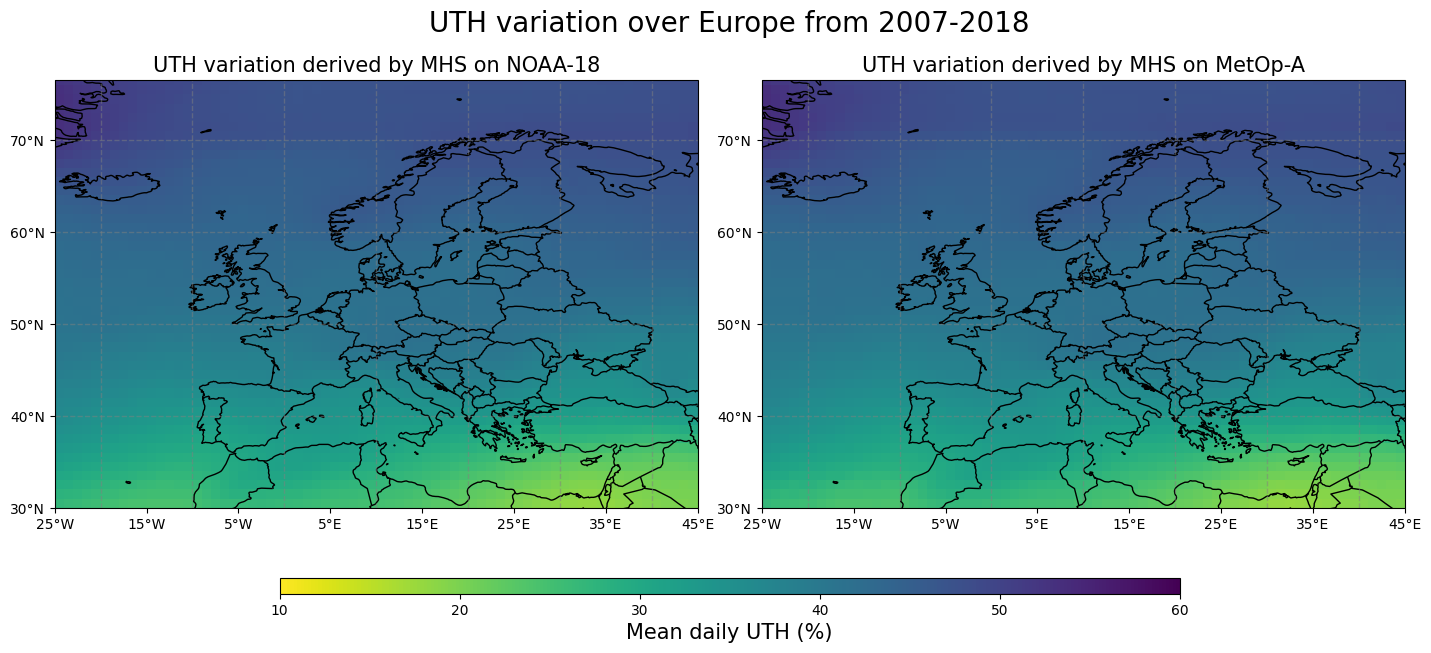

In [ ]:
# We use "subplots" to place multiple plots according our needs. In this case we want 2 plots
# alongside in one row.

# For this we define "nrows" = 1 and "ncols" = 2, the projection and size is defined as well
fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': ccrs.PlateCarree()},
                       figsize=(15, 8))

# We run the same routine twice with different dataset and title (see above)
# Note: All indented lines are passed through by the loop until a line is not indented, so make
# sure emtpy lines are indented as well.
# At the first run i=0, at the second run i=1 and based on this the indecees of both lists
# (see above) are considered
for i in range(0, 2):
    
    # Plot data (coordinates and data) and define colormap, minimum and maximum values
    cs = ax[i].pcolormesh(lon_europe, lat_europe, datasets[i], cmap='viridis_r', vmin=10, vmax=60)
    
    # Set title and size
    ax[i].set_title('UTH variation derived by MHS on ' + titles[i], fontsize=15)
    
    # Add coastlines and country borders to the map
    ax[i].coastlines()
    ax[i].add_feature(cfeature.BORDERS)
    
    # Restrict plot area to Europe
    ax[i].set_extent([-25, 45, 30, 74])
    
    # Define grid lines and ticks (e.g. from -25 to 46 in an interval of 10)
    ax[i].set_xticks(np.arange(-25, 46, 10), crs=ccrs.PlateCarree())
    ax[i].set_yticks(np.arange(30, 76, 10), crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter()
    lat_formatter = LatitudeFormatter()
    ax[i].xaxis.set_major_formatter(lon_formatter)
    ax[i].yaxis.set_major_formatter(lat_formatter)
    gl = ax[i].gridlines(linewidth=1, color='gray', alpha=0.5, linestyle='--')

# Place the subplots
fig.subplots_adjust(bottom=0.0, top=1.25, left=0.05, right=0.95, wspace=0.1, hspace=0.5)

# Define and place a horizontal colorbar at the bottom
cbar_ax = fig.add_axes([0.2, 0.25, 0.6, 0.02])
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Mean daily UTH (%)', fontsize=15)

# Define an overall title
plt.suptitle('UTH variation over Europe from 2007-2018', fontsize=20)

# Save figure to defined folder
plt.savefig(figpath + 'UTH_Europe_map.png')

# Show plot and close it afterwards to reduce the amount of storage
plt.show()
plt.close()

Figure 3 shows the temporal mean of the daily UTH over Europe, between 25°W to 45°E longitude and 30°N to 74°N latitude, derived from NOAA-18 MHS (left) and MetOp-A MHS (right) from 2007 to 2018.

The main feature illustrated by both plots is the general north-south gradient of the UTH. The relatively dry Mediterranean regions have been significantly influenced by the descending branch of the Hadley Cell. The cool, dry air warms adiabatically as it descends, causing reduction in relative humidity and UTH. One can see that both plots look very similar and the data are very well comparable.

### Calculation of climatology over Europe

In a next step we want to plot a time series of both datasets. A spatial average is required which isn't as trivial to calculate as it sounds. The area of a grid cell depends on the latitude with greater areas per grid cell towards the equator (as you can imagine 1/360 of the circumference of the earth is higher at the equator with the maximum perimeter to find there). In case every grid cell would be treated with the same weighting it would result in an overestimation of the grid cells towards the high latitudes. This is because all grid cells (1°x1°) in the dataset are weighted the same by now. Since the grid cells are defined by the latitudes and longitudes the areas are in real not equal in size and need to be multiplied by a factor. This is called cosine-weighted-averaging, since the cosine of the latitude is maximum at the equator (0° with cos(0°) = 1) and becomes smaller towards high latitudes (90° with cos(90°) = 0). This represents the ratio of the grid cells in terms of size with _too big areas_ towards high latitudes multiplied accordingly with a smaller number.

In [ ]:
# Get the weightning-factors for each latitude with the functions np.cos and np.deg2rad
# The latitudes are provided by the variable of the dataset_noaa18 dataset (dataset_noaa18.lat)
# The function np.deg2rad converts the values from "degree" to "radiances" and np.cos calculates the
# cosine of these values
weights = np.cos(np.deg2rad(dataset_noaa18.lat))

# The array "weights" is named "weights" and has 180 values
# [0.00872654 ... 99996192 ... 0.00872654] for [-89.5° ... 0.5° ... 89.5°]
weights.name = "weights"

# The datasets and respective variable are weighted (.weighted) with the array "weights"
weighted_data = dataset_noaa18_europe['uth_mean_ascend_descend'].weighted(weights)
# The previously created dataset "weighted_data" is averaged spatially (.mean(("lon", "lat"))) and
# nan's skipped
data_noaa18_europe = weighted_data.mean(("lon", "lat"), skipna=True)

weighted_data = dataset_metopa_europe['uth_mean_ascend_descend'].weighted(weights)
data_metopa_europe = weighted_data.mean(("lon", "lat"), skipna=True)

Get time values to plot the climatology. One fact that should not be neglected working with satellite data is gaps. The generation of satellite data is highly complex and instruments fail from time to time leading to gaps for certain days or months. To be save and visualizing correct data we take the dates from the dataset itself instead of creating an own time vector.

In [ ]:
# This operation gives us the "values" of the "time" dimension
time_noaa18 = dataset_noaa18_europe.time.values
time_metopa = dataset_metopa_europe.time.values

### Plot of climatology over Europe

This time we will plot a time series with different commands. To make the data comparable both time series are put together in one plot: 

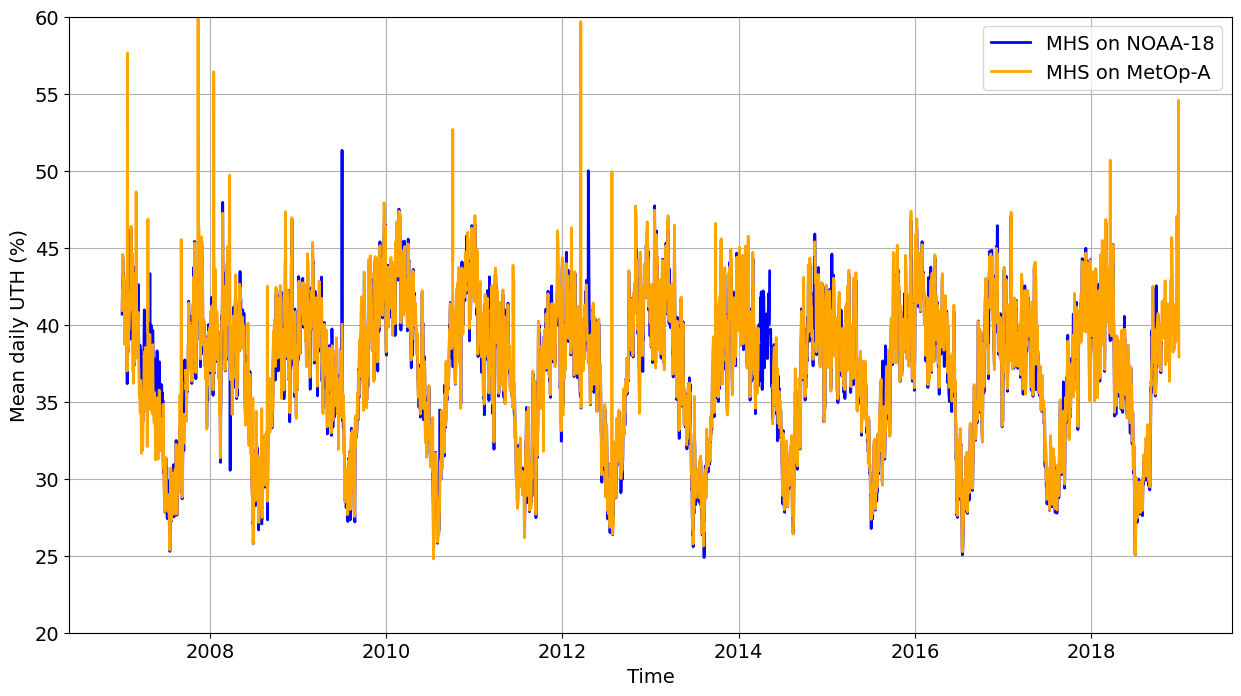

In [ ]:
# Create figure and define size
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

# Plot data for NOAA-18 and MetOp-A and adjust color, label and linewidth
plt.plot(time_noaa18, data_noaa18_europe, color='blue', label='MHS on NOAA-18', linewidth=2)
plt.plot(time_metopa, data_metopa_europe, color='orange', label='MHS on MetOp-A', linewidth=2)

# Add legend and place it to the top right
plt.legend(loc='upper right', fontsize=14)

# Add x- and y-axis label and size
plt.xlabel('Time', fontsize=14)
plt.ylabel('Mean daily UTH (%)', fontsize=14)

# Add limits of y-axis
plt.ylim(20, 60)

# Add ticks and background grid
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(True)

# Save figure to defined folder
plt.savefig(figpath + 'UTH_Europe_climatology.png')

# Show plot
plt.show()
plt.close()

Figure 4 shows the time series of mean daily UTH over Europe from NOAA-18 MHS (blue) and MetOp-A MHS (orange).

An annual variation of UTH is evident from the time series, which shows the spatial mean of the MHS derived UTH over the same European region as shown in Figure 3 for each satellite. The overall UTH decreases during summer, reaching area averaged values of 30-35%, as the Hadley cell moves north and has a greater impact over the region before retreating south again in winter. Note also the close agreement between the UTH derived from each satellite throughout the time period.

Outlook after Use Case #1: We did the analysis for a certain time period, certain satellites and a certain region and provided a maps as well as a time series. It is now up to you to either continue with the next use case or try adjust the code for different regions, time periods ... This might be a good way to gain also programming skills to detect the parts of the code which needs be changed. Please watch out for the naming of files, arrays and plots to keep track and a clear structure in your folders!

## 4. Global UTH distribution, seasonal variation and annual cycle

Use Case #2 has global coverage and provides information on the distribution of UTH across the planet. However, we do not have to download the data again, but take advantage of the fact that we have already downloaded and read it earlier. Use Case #2 provides additional information about the seasonal variation as well as the annual cycle.
Starting points are the xarray datasets **dataset_noaa18** and **dataset_metopa** from above but without any restrictions concerning only Europe.

### 4.1 Calculation of temporal mean with global coverage

In [ ]:
# Calculate temporal average
# Once again the function nanmean calculates the average ignoring nan's, axis=0 averages over the
# time dimension
average_noaa18 = np.nanmean(dataset_noaa18['uth_mean_ascend_descend'], axis=0)
average_metopa = np.nanmean(dataset_metopa['uth_mean_ascend_descend'], axis=0)

# Get longitude and latitude coordinates. Both are variables of the dataset and available with the
# .variables['lat/lon'] function, [:] usually means ["from":"till"] but without numbers it means
# "everything"
lon_global = dataset_noaa18.variables['lon'][:]
lat_global = dataset_noaa18.variables['lat'][:]

/tmp/ipykernel_17482/2268510229.py:4: RuntimeWarning: Mean of empty slice
  average_noaa18 = np.nanmean(dataset_noaa18['uth_mean_ascend_descend'], axis=0)
/tmp/ipykernel_17482/2268510229.py:5: RuntimeWarning: Mean of empty slice
  average_metopa = np.nanmean(dataset_metopa['uth_mean_ascend_descend'], axis=0)


You just might noticed a so-called **RuntimeWarning: Mean of empty slice** with the above command. This is correct and easy to explain: Since the command calculates the temporal average it calculates the average for each grid cell over all time steps. In case there is a grid cell with nan's for all days it results in a warning to calculate a "mean of an empty slice". This grid cell will also be marked as nan and can be seen in the following plot e.g. 80°S and 90°E.

Again we are plotting two maps and take advantage of a loop and prepare lists to run through:

In [ ]:
datasets = [average_noaa18, average_metopa]
titles = ['NOAA-18', 'MetOp-A']

### 4.2 Plot of temporal mean with global coverage

The plotting routine is pretty much the same like Figure 3 with small adjustments concerning latitude and longitude:

In [ ]:
# We use "subplots" to place multiple plots according our needs. In this case we want 2 plots
# alongside in a row.

# For this we define "nrows" = 1 and "ncols" = 2, the projection and size is defined as well
fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': ccrs.PlateCarree()},
                       figsize=(15, 8))

# We run the same routine twice with different datasets and titles (see above)
# Note: All indented lines are passed through by the loop until a line is not indented, so make
# sure emtpy lines are indented as well.
# At the first run i=0, at the second run i=1 and based on this the indecees of both lists
# (see above) are considered
for i in range(0, 2):
    
    # Plot data (coordinates and data) and define colormap, minimum and maximum values
    cs = ax[i].pcolormesh(lon_global, lat_global, datasets[i], cmap='viridis_r', vmin=10, vmax=70)
    
    # Set title and size
    ax[i].set_title('UTH variation derived by MHS on ' + titles[i], fontsize=15)
    
    # Add coastlines
    ax[i].coastlines()
    
    # Define grid lines and ticks (e.g. from -180 to 180 in a interval of 60)
    ax[i].set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
    ax[i].set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter()
    lat_formatter = LatitudeFormatter()
    ax[i].xaxis.set_major_formatter(lon_formatter)
    ax[i].yaxis.set_major_formatter(lat_formatter)
    gl = ax[i].gridlines(linewidth=1, color='gray', alpha=0.5, linestyle='--')

# Place the subplots
fig.subplots_adjust(bottom=0.0, top=1.40, left=0.05, right=0.95, wspace=0.1, hspace=0.5)

# Define and place a colorbar at the bottom
cbar_ax = fig.add_axes([0.2, 0.39, 0.6, 0.02])
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Mean daily UTH (%)', fontsize=15)

# Define an overall title
plt.suptitle('Global UTH variation from 2007-2018', fontsize=20)

# Save figure to defined folder
plt.savefig(figpath + 'UTH_global_map.png')

# Show plot
plt.show()
plt.close()

NameError: name 'plt' is not defined

Figure 5 shows the temporal mean of the daily UTH from 2007-2018 with global coverage. With a few exceptions there is still a gradient from the equator towards the poles with higher values towards higher latitudes. One exception can be seen right around the equator with much higher values, in particular northwest of Australia but also parts of South America and Africa. But we will address this later ...

### 4.3 Calculation of seasonal average with global coverage

In a further analysis we want to split the data according to the seasons. This will be only done for the NOAA-18 data since it is suffiently shown that the data of different satellites differs only slightly.
Seasons are defined as follows:
    - Spring: March, April, May
    - Summer: June, July, August
    - Autumn: September, October, November
    - Winter: December, January, February

To achieve this we use the **.groupby** function with the addition **time.season**. That means the dataset is splitted into predefined seasons in consideration of the time variable. The addition **.mean('time')** averages the data according to the time dimension to achieve a temporal average. 

In [ ]:
# We cut the dataset in time at the beginning and end to make sure only complete seasons are taken
# into account. The first season will be Spring 2007, the last is Autumn 2018. With the function
# .sel (select) we define to reduce the data to a defined range of dates at the time dimension
dataset_noaa18_sel = dataset_noaa18.sel(time=slice('2007-02-01', '2018-11-30'))

# Split dataset by season
seasonal_average = dataset_noaa18_sel.groupby('time.season').mean('time')

In [ ]:
seasonal_average

<xarray.Dataset>
Dimensions:                  (lon: 360, lat: 180, season: 4)
Coordinates:
  * lon                      (lon) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
  * lat                      (lat) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * season                   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    uth_mean_ascend_descend  (season, lat, lon) float32 75.23 nan ... 62.09 58.1

The xarray "seasonal_average" has four entries in the time dimension (one for each season).

In [ ]:
# Get the four seasons from the xarray for the variable "uth_mean_ascend_descend" with the
# respective index [0] - [3]

winter = seasonal_average['uth_mean_ascend_descend'][0]
summer = seasonal_average['uth_mean_ascend_descend'][1]
spring = seasonal_average['uth_mean_ascend_descend'][2]
autumn = seasonal_average['uth_mean_ascend_descend'][3]

### 4.4 Plot of seasonal average with global coverage

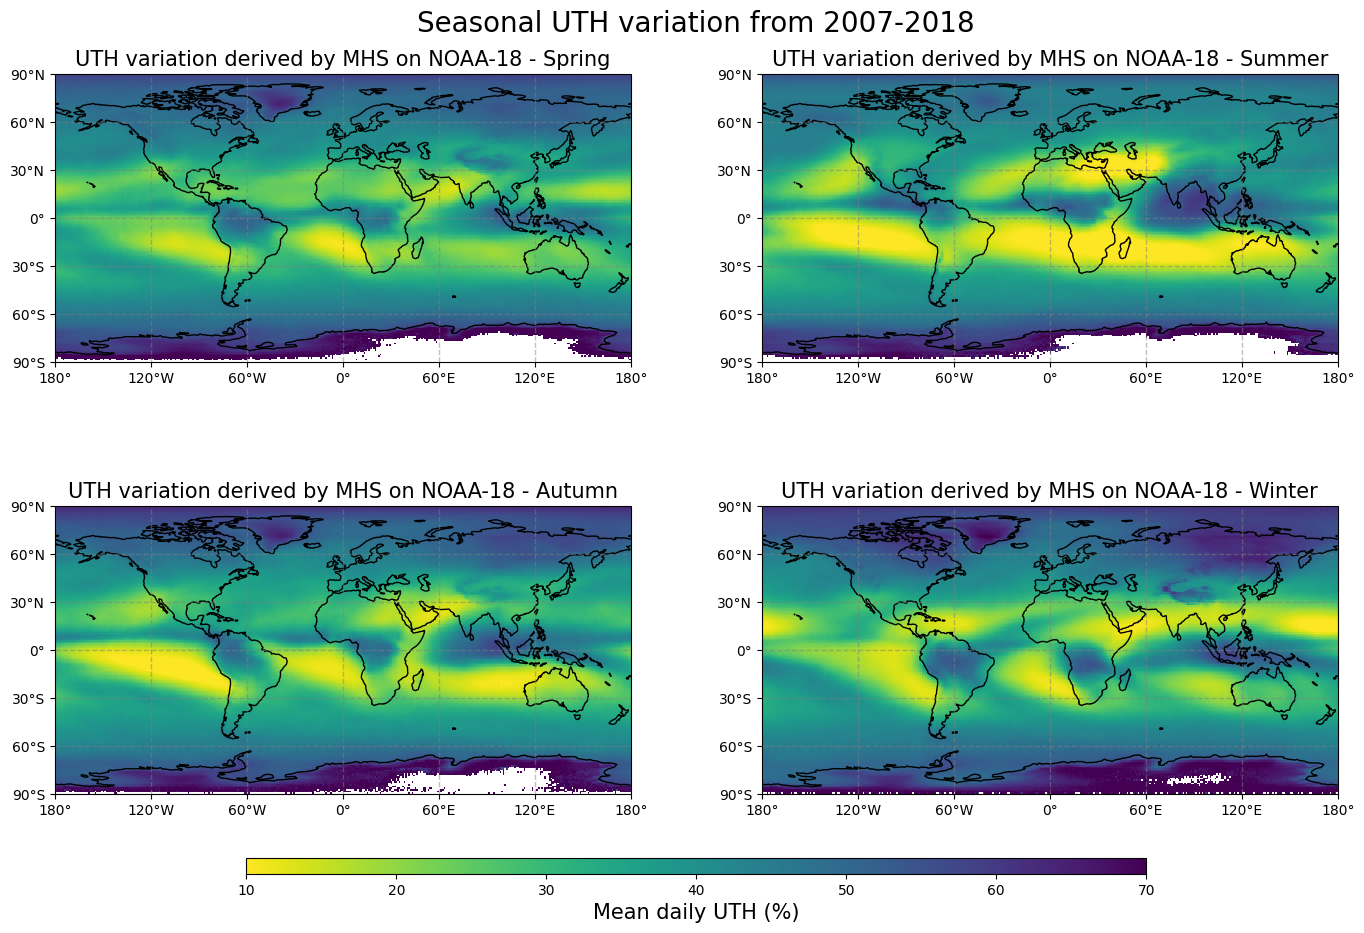

In [ ]:
# We create a 2x2 matrix in advance of the 2x2 setup of the plots. This helps us to make the plot
# with 2 loops

# Creation of an empty 2x2 matrix called "dataset"
w, h = 2, 2
dataset = [[0 for x in range(w)] for y in range(h)]

# Fill the matrix with the before defined input - e.g. spring will be shown at the top left, winter
# at the bottom right
dataset[0][0] = spring
dataset[0][1] = summer
dataset[1][0] = autumn
dataset[1][1] = winter

# Steps will be repeated for the plots titles
title = [[0 for x in range(w)] for y in range(h)]
title[0][0] = 'Spring'
title[0][1] = 'Summer'
title[1][0] = 'Autumn'
title[1][1] = 'Winter'

# We use the "subplots" to place multiple plots according to our needs. In this case we want 4 plots
# in a 2x2 format. For this "nrows" = 2 and "ncols" = 2, the projection and size is defined as well
fig, ax = plt.subplots(nrows=2, ncols=2, subplot_kw={'projection': ccrs.PlateCarree()},
                       figsize=(15, 8))

# We run the same routine twice with different datasets and titles (see above)
for i in range(0, 2):
    for j in range(0, 2):
        
        # Plot data (coordinates and data) and define colormap, minimum and maximum values
        cs = ax[i][j].pcolormesh(lon_global, lat_global, dataset[i][j], cmap='viridis_r', vmin=10,
                                 vmax=70)
        
        # Set title and size
        ax[i][j].set_title('UTH variation derived by MHS on NOAA-18 - ' + title[i][j], fontsize=15)
        
        # Add coastlines
        ax[i][j].coastlines()
        
        # Define grid lines and ticks (e.g. from -180 to 180 in a interval of 60)
        ax[i][j].set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
        ax[i][j].set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
        lon_formatter = LongitudeFormatter()
        lat_formatter = LatitudeFormatter()
        ax[i][j].xaxis.set_major_formatter(lon_formatter)
        ax[i][j].yaxis.set_major_formatter(lat_formatter)
        gl = ax[i][j].gridlines(linewidth=1, color='gray', alpha=0.5, linestyle='--')

# Place the subplots
fig.subplots_adjust(bottom=0.0, top=0.9, left=0.05, right=0.95, wspace=0.1, hspace=0.5)

# Define and place a colorbar at the bottom
cbar_ax = fig.add_axes([0.2, -0.1, 0.6, 0.02])
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Mean daily UTH (%)', fontsize=15)

# Define an overall title
plt.suptitle('Seasonal UTH variation from 2007-2018', fontsize=20)

# Save figure to defined folder
plt.savefig(figpath + 'UTH_season_map.png')

# Show plot
plt.show()
plt.close()

Figure 6 shows the seasonal averages for Spring to Winter (top left to bottom right) derived from NOAA-18 MHS from 2007 to 2018. The general pattern is overall the same with lower values in the tropics around the equator and higher values towards high latitudes. Again remarkable is the narrow band of high UTH values around the equator, particular over land and between Asia and Australia. One can see that the band is not constant all year in the same place but moving northwards towards summer and southwards towards winter. This is similar to the course of the Inter-Tropical Convergence Zone (ITCZ) and related to it:

Solar radiation is highest at the highest solar zenith angle, which is in general in the tropics. Since the earth's orbit around the sun is in a 23,5° angle the hightest solar zenith angle is moving over the course of a year. It is highest to the north in end of June and highest to the south in end of December.

Due to the shortwave radiation and warming of the land/oceans masses warm air rises and cools adiabatically which leads to increased Upper Tropospheric humidity and cloud coverage. This in turn leads to near ground winds from north and south directions towards the ITCZ and rising air masses due to convergence. Cause of the different specific heat capacities of land and ocean this effect is more significant over land, as everyone has surely noticed, land heats up much faster than water.

### 4.5 Calculation of annual cycle with global coverage

In a last step we want to create a mean annual cycle. For this we need to apply the cosine-weighted-averaging (as to all spatial means).

In [ ]:
# We use again the known method to calculate the weightned average - this time on a global scale
weighted_data = dataset_noaa18['uth_mean_ascend_descend'].weighted(weights)
data_noaa18 = weighted_data.mean(("lon", "lat"), skipna=True)

weighted_data = dataset_metopa['uth_mean_ascend_descend'].weighted(weights)
data_metopa = weighted_data.mean(("lon", "lat"), skipna=True)

# To split the data by months we use the ".groupby" function with the addition "time.month".
# That means the dataset is splitted into months in consideration of the time variable.
# The addition ".mean('time')" averages the data according to the time dimension to achieve an
# average for each month.
dataset_noaa18 = data_noaa18.groupby('time.month').mean('time')
dataset_metopa = data_metopa.groupby('time.month').mean('time')

NameError: name 'dataset_noaa18' is not defined

### 4.6 Plot of annual cycle with global coverage

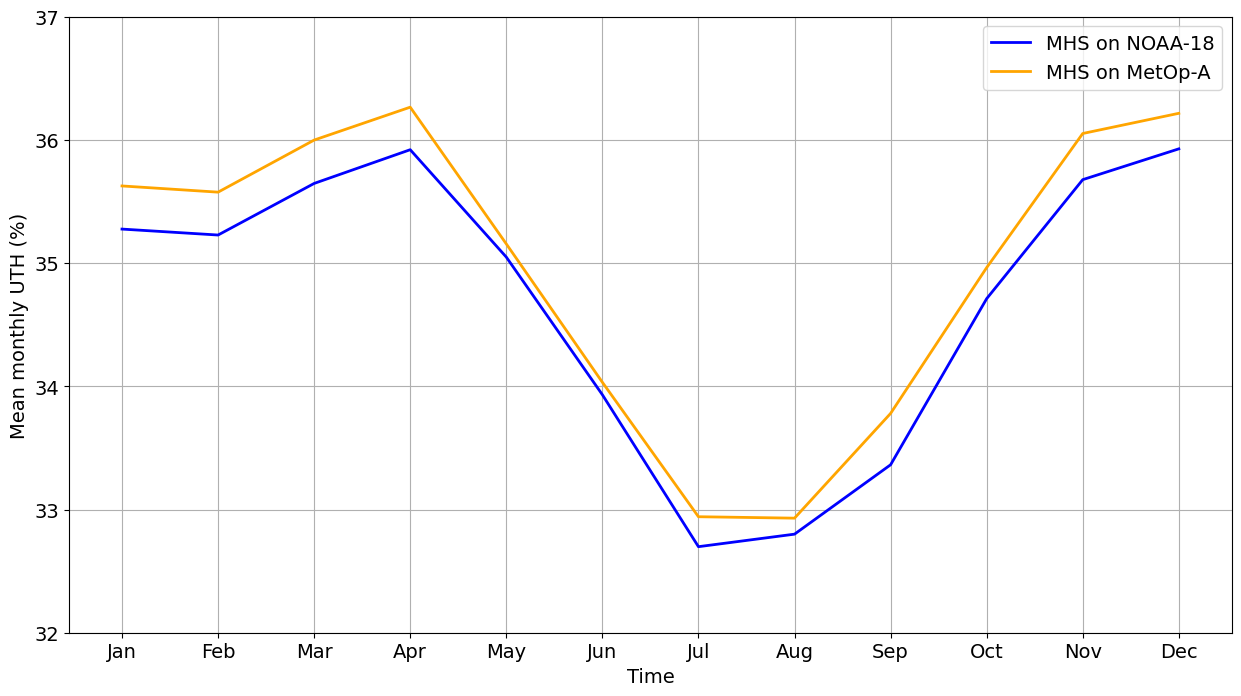

In [ ]:
# Creation of a vector containing the months of the year
year = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot of the annual cycle, define the size
fig = plt.figure(figsize=(15, 8))

# Plot the data against the year, define color, label and linewidth
plt.plot(year, dataset_noaa18, color='blue', label='MHS on NOAA-18', linewidth=2)
plt.plot(year, dataset_metopa, color='orange', label='MHS on MetOp-A', linewidth=2)

# Add a legend and define the size
plt.legend(loc='upper right', fontsize=14)

# Add x- and y-axis labels and size
plt.xlabel('Time', fontsize=14)
plt.ylabel('Mean monthly UTH (%)', fontsize=14)

# Define y-axis limts
plt.ylim(32, 37)

# Add ticks on both axis
plt.xticks(size=14)
plt.yticks(size=14)

# Add background grid
plt.grid(True)

# Save figure to defined folder
plt.savefig(figpath + 'UTH_global_annual_cycle.png')

# Show plot
plt.show()
plt.close()

Figure 7 shows the annual cycle of the UTH from NOAA-18 (blue) and MetOp-A (orange) averaged from 2007-2018. Looking at the scale shows that the overall difference between minimum (July/August) and maximum (April/November) is only in a range of 4%. But there is indeed an annual cycle with lower values in summer months and higher values in winter especially towards spring. Both datasets agree in general with only slight differences in March, April and December.

Outlook after Use Case #2: There were some new features introduced in Use Case 2 with seasonal averages and annual cycles. But there is much more to investigate with the data, so feel free to get experimental and gain more skills on UTH and python!

## 5. Literature

[1] Easterbrook, D.J.: <br>
Chapter 9 - Greenhouse Gases, Evidence-Based Climate Science (Second Edition) 2016, <br>
Pages 163-173, https://doi.org/10.1016/B978-0-12-804588-6.00009-4

[2] Held, Isaac M., Soden, Brian J.: <br>
Water Vapor Feedback and Global Warming, Annual Review of Energy and the Environment 2000 Vol 25,<br>
Pages 441-475, https://doi.org/10.1146/annurev.energy.25.1.441